In [1]:
# Use the wine data file wine-labeled.csv. This data file contains
# twelve chemical identifiers for over 6000 wines and a label of
# either red or white
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
# load in data set
wine_data = pd.read_csv('../wine-labeled.csv')

wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [3]:
# a. Convert the X-data to a numpy array. Drop the quality column
# Convert the red/white column to 1/0

# drop quality column
wine_data.drop(columns='quality', inplace=True)

# convert the red/white column to 1/0
def convert_wine_type(x):
    if x == 'red':
        return 1
    if x == 'white':
        return 0
    
wine_data['type'] = np.array([convert_wine_type(x) for x in wine_data['type']])

# gather x_data
x_data = np.array(wine_data.loc[:,'fixed acidity':'alcohol'])

# gather y data
y_data = np.array(wine_data.loc[:,'type'])

In [4]:
# b. Calculate the top 5 principal components and find the explained
# variance ratio
pca = PCA(n_components=5)
pca.fit(x_data)
pca.components_

array([[-7.40796441e-03, -1.18432899e-03,  4.86869305e-04,
         4.10197175e-02, -1.68198717e-04,  2.30481781e-01,
         9.72166826e-01,  1.77233905e-06, -6.55520548e-04,
        -7.04338632e-04, -5.45173684e-03],
       [-5.36562393e-03, -7.84498565e-04, -2.47947037e-04,
         1.86364316e-02,  6.72674387e-05,  9.72658270e-01,
        -2.31409676e-01,  1.32996637e-06,  6.47986887e-04,
         3.46357533e-04,  2.85017390e-03],
       [ 2.37980377e-02,  8.84101767e-04,  1.92869419e-03,
         9.95274105e-01,  1.73019914e-04, -2.72149098e-02,
        -3.58290013e-02,  4.60408843e-04, -6.91161807e-03,
        -1.93529116e-03, -8.23558184e-02],
       [ 8.57756781e-01,  1.71342614e-02,  3.53280563e-02,
        -6.23231011e-02,  9.19466873e-03,  8.47350928e-03,
         4.31640540e-03,  1.41804609e-03, -3.53876123e-02,
         2.70799224e-02, -5.06621053e-01],
       [ 5.07838342e-01, -1.53591509e-02,  4.34990985e-02,
         5.87771145e-02, -6.57467616e-03,  6.06766412e-04,
  

In [5]:
# c. Determine the top 2 principal components as a new array P
P = pca.transform(x_data)[:,:2]

P

array([[-84.11114893,  -0.14511749],
       [-48.779427  ,   5.84731927],
       [-63.73457506,  -0.87641627],
       ...,
       [ -4.89614162,   0.50856799],
       [ -8.18853172,  -8.97328116],
       [-19.4038995 ,  -4.26220226]])

In [6]:
# d. Perform classification using your favorite method
KNN4 = KNeighborsClassifier(n_neighbors=4)

x_tr, x_ts, y_tr, y_ts = train_test_split(P, y_data, test_size=0.2)

KNN4.fit(x_tr, y_tr)

y_predict = KNN4.predict(x_ts)

accuracy_score(y_ts, y_predict)

0.9223076923076923

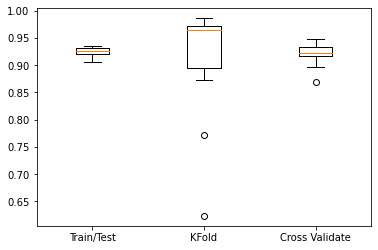

In [7]:
# e. Use multiple train/test, kfold, cross val using KNN4

# train/test accuracies test_size 10%
def eval_train_test(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
    
    model.fit(x_train, y_train)
    
    y_pre = model.predict(x_test)
        
    return accuracy_score(y_test, y_pre)

# run 10 iterations of train test split with KNN4
tr_ts_accuracies = []
for _ in range(10):
    tr_ts_accuracies.append(eval_train_test(P, y_data, KNN4))
    
# run kfold with 10 splits on KNN4
kf = KFold(n_splits=10)
KNN = KNeighborsClassifier(n_neighbors=4)
kfold_accuracies = []
for train_index, test_index in kf.split(P):
    x_train, x_test = P[train_index], P[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index] 
    
    KNN.fit(x_train, y_train)
    
    y_pre = KNN.predict(x_test)
    
    kfold_accuracies.append(accuracy_score(y_test, y_pre))
    
# run cross validation with 10 split cv on KNN4
KNN4_2 = KNeighborsClassifier(n_neighbors=4)

cross_accuracies = list(cross_val_score(KNN4_2, P, y_data, scoring='accuracy', cv=10))

plt.boxplot([tr_ts_accuracies, kfold_accuracies, cross_accuracies])
plt.xticks([1,2,3],["Train/Test","KFold","Cross Validate"])
plt.show()